In [1]:
import os
os.chdir('..')  # Mueve el directorio de trabajo un nivel arriba




In [4]:
os.getcwd()  # Muestra la ruta actual


'c:\\Users\\esmaru\\Desktop\\Esteban\\repos'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.misc import derivative
from functions_master import *
import warnings
from glob import glob

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


c = 0.299792458 # speed of light mm/ps

def FourierT2(f,N):
    return np.conj(sp.fft.fft(f.values,n=N))

def calcular_n(omega, phi_exp, c, d):

    return 1 + (c / (omega * d)) * phi_exp

def calcular_kappa(omega, T_exp, n, c, d):

    term = ((n + 1)**2 / (4 * n)) * T_exp
    return -(c / (omega * d)) * np.log(term)


def extraer_angulos(nombres_archivos):
    """
    Extrae el patrón que está después del último '__' y antes de '.dat'
    Ejemplo: '...__hori-80deg.dat' → 'hori-80deg'
    """
    patrones = []
    patron_regex = re.compile(r'__([^__]+)\.dat$')  # Captura lo entre último __ y .dat
    
    for nombre in nombres_archivos:
        coincidencia = patron_regex.search(nombre)
        if coincidencia:
            patrones.append(coincidencia.group(1))
    
    return patrones


ModuleNotFoundError: No module named 'functions_master'

In [ ]:
# Configuración desde el archivo txt (simulada aquí como un diccionario)
config = {
    'figure.constrained_layout.use': True,
    'figure.figsize': (5.4, 3.2),
    'figure.titlesize': 'small',
    'figure.labelsize': 'small',
    'font.size': 10,
    'font.family': 'serif',
    'text.usetex': False,
    'pgf.texsystem': 'lualatex',
    'pgf.rcfonts': False,
    'pgf.preamble': r'\usepackage{siunitx,fontspec}\setmainfont{Times New Roman}',
    'lines.linewidth': 1,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 4,
    'legend.frameon': False,
    'legend.markerscale': 0.8,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.2,
    'xtick.top': True,
    'xtick.major.size': 5,
    'xtick.major.width': 0.8,
    'xtick.minor.width': 0.8,
    'xtick.minor.size': 3,
    'xtick.labelsize': 'small',
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.major.size': 5,
    'ytick.major.width': 0.8,
    'ytick.minor.width': 0.8,
    'ytick.minor.size': 3,
    'ytick.labelsize': 'small',
    'ytick.direction': 'in',
    'axes.linewidth': 0.8,
    'axes.axisbelow': False,
    'axes.labelsize': 'medium',
    'axes.labelpad': 2,
    'figure.constrained_layout.h_pad': 0.02,
    'figure.constrained_layout.w_pad': 0.01,
    'figure.constrained_layout.hspace': 0.02,
    'figure.constrained_layout.wspace': 0.02,
    'svg.fonttype': 'none'
}

# Aplicar la configuración
plt.rcParams.update(config)

In [6]:
ruta_actual = os.getcwd()
carpeta_azul_h = os.path.join(ruta_actual,"analisis_calcite","calcita_azul_horizontal")
carpeta_ref = os.path.join(ruta_actual,"analisis_calcite","reference")
carpeta_transp_h = os.path.join(ruta_actual,"analisis_calcite","calcita_transp_hori")

rutas_azul_h = glob(os.path.join(carpeta_azul_h, "*"))
angulos_azul_h  = extraer_angulos(rutas_azul_h)
rutas_ref = glob(os.path.join(carpeta_ref, "*"))
rutas_transp_h = glob(os.path.join(carpeta_transp_h, "*"))
angulos_transp_h  = extraer_angulos(rutas_transp_h)


# Calcite Azul H

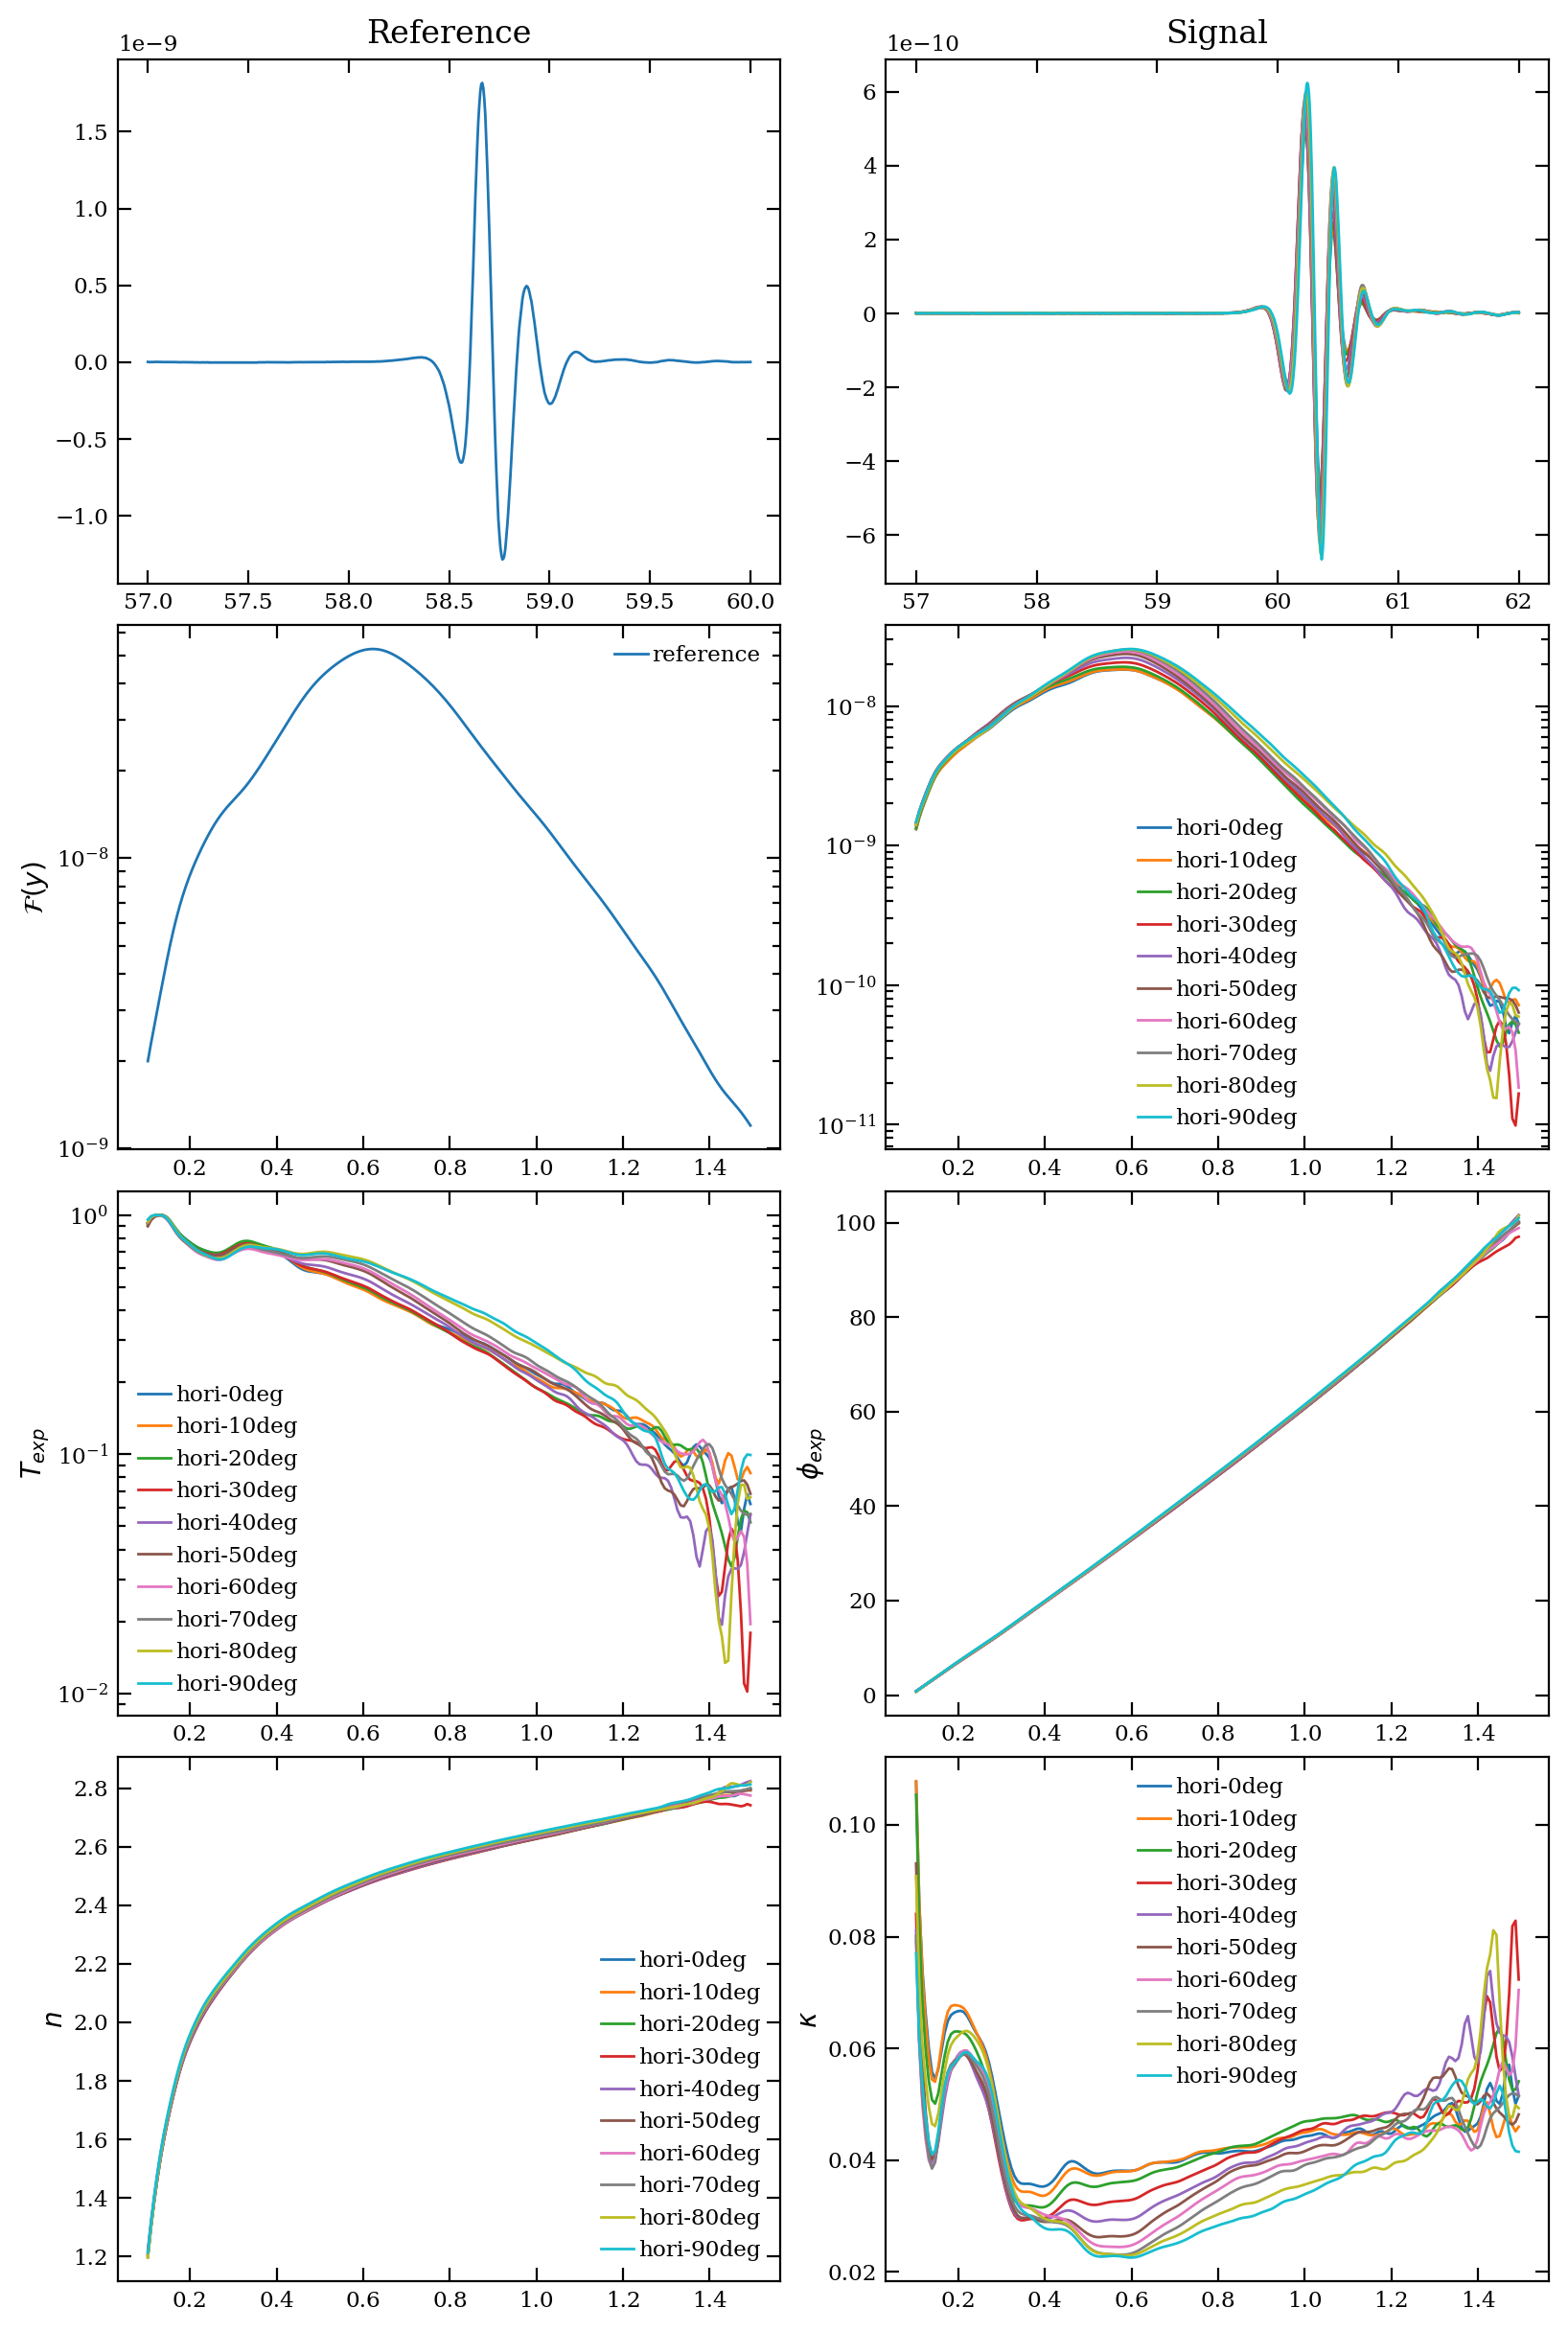

In [7]:
right_ref= 60
left = 57
N = 2**12
d = 1.78
f = plt.figure(figsize=(8,12),dpi=200)



plt.subplot(421)

x_ref,y_ref = getFilterdata(rutas_ref[0],right_ref,left)
plt.plot(x_ref,y_ref)
plt.title("Reference")



for j,path_signal in enumerate(rutas_azul_h):
    right_sample = 62
    left = 57
    plt.subplot(422)
    x,y = getFilterdata(path_signal,right_sample,left)
    # df1 = pd.read_csv(path_signal, delim_whitespace=True)
    plt.plot(x,y)
    plt.title("Signal")

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    # fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

     # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.1, 1.5
    mask = (nu >= xmin) & (nu <= xmax)

    nu_filtradas = nu[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]

    T = fft_y_signal/fft_y_subs
    T_exp = abs(T)
    phi_exp = np.angle(T)
    phi_exp = np.unwrap(phi_exp)

    plt.subplot(423)

    if j == 0:
        plt.plot(nu_filtradas,abs(fft_y_subs),label='reference')
    plt.legend()
    plt.ylabel(r"$\mathcal{F}(y)$")
    plt.yscale('log')

    plt.subplot(424)
    plt.plot(nu_filtradas,abs(fft_y_signal),label=angulos_azul_h[j])
    plt.legend()
    # plt.plot(nu_filtradas,abs(T)/max(abs(T)))
    plt.yscale('log')


    plt.subplot(425)
    plt.plot(nu_filtradas,abs(T)/max(abs(T)),label=angulos_azul_h[j])
    plt.ylabel(r"$T_{exp}$")
    plt.yscale('log')
    plt.legend()

    plt.subplot(426)
    plt.plot(nu_filtradas,phi_exp)
    plt.ylabel(r"$\phi_{exp}$")

    plt.subplot(427)
    n = calcular_n(nu_filtradas*2*np.pi, phi_exp, c, d)
    plt.plot(nu_filtradas,n,label=angulos_azul_h[j])
    plt.legend()
    plt.ylabel(r"$n$")
    
    plt.subplot(428)
    plt.ylabel(r"$\kappa$")
    plt.plot(nu_filtradas,calcular_kappa(nu_filtradas*2*np.pi, T_exp, n, c, d),label=angulos_azul_h[j])
    plt.legend()

# Calcite_azul_mixed

In [8]:
ruta_actual = os.getcwd()
carpeta_azul_h = os.path.join(ruta_actual,"analisis_calcite","calcita_azul_anti")
carpeta_ref = os.path.join(ruta_actual,"analisis_calcite","reference")


rutas_azul_h = glob(os.path.join(carpeta_azul_h, "*"))
angulos_azul_h  = extraer_angulos(rutas_azul_h)
rutas_ref = glob(os.path.join(carpeta_ref, "*"))


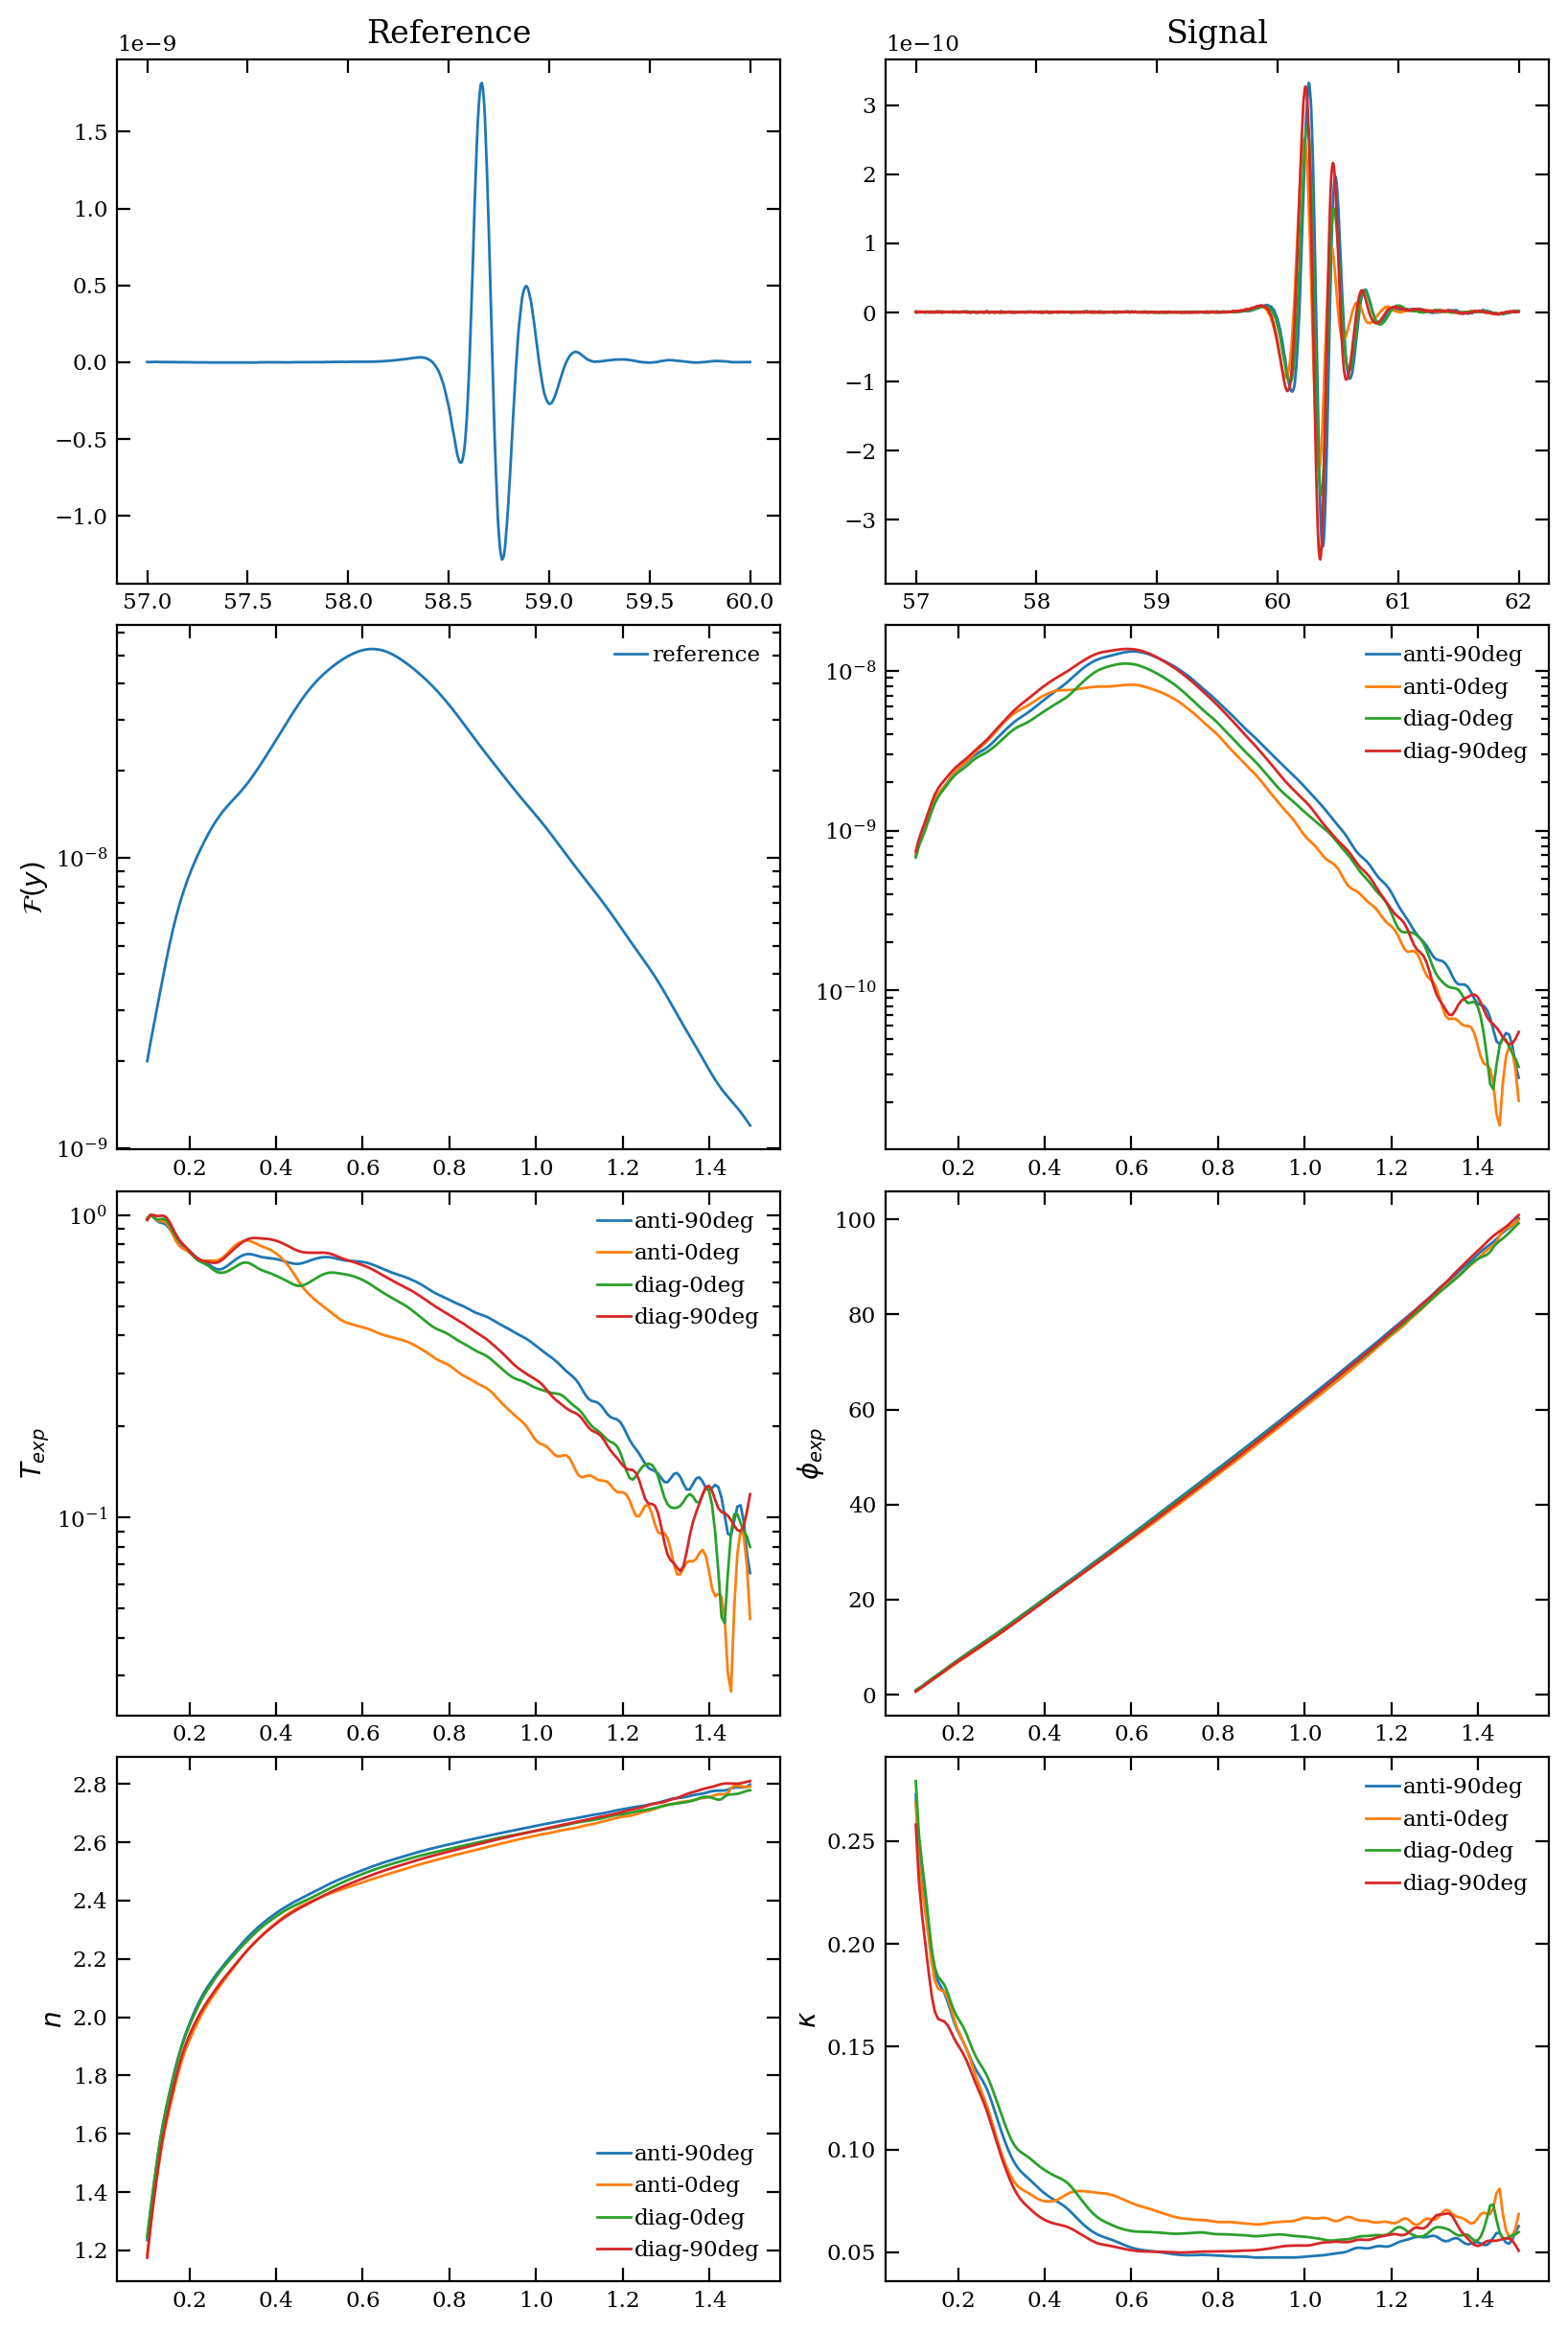

In [9]:
right_ref= 60
left = 57
N = 2**12
d = 1.78
f = plt.figure(figsize=(8,12),dpi=200)



plt.subplot(421)

x_ref,y_ref = getFilterdata(rutas_ref[0],right_ref,left)
plt.plot(x_ref,y_ref)
plt.title("Reference")



for j,path_signal in enumerate(rutas_azul_h):
    right_sample = 62
    left = 57
    plt.subplot(422)
    x,y = getFilterdata(path_signal,right_sample,left)
    # df1 = pd.read_csv(path_signal, delim_whitespace=True)
    plt.plot(x,y)
    plt.title("Signal")

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    # fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

     # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.1, 1.5
    mask = (nu >= xmin) & (nu <= xmax)

    nu_filtradas = nu[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]

    T = fft_y_signal/fft_y_subs
    T_exp = abs(T)
    phi_exp = np.angle(T)
    phi_exp = np.unwrap(phi_exp)

    plt.subplot(423)

    if j == 0:
        plt.plot(nu_filtradas,abs(fft_y_subs),label='reference')
    plt.legend()
    plt.ylabel(r"$\mathcal{F}(y)$")
    plt.yscale('log')

    plt.subplot(424)
    plt.plot(nu_filtradas,abs(fft_y_signal),label=angulos_azul_h[j])
    plt.legend()
    # plt.plot(nu_filtradas,abs(T)/max(abs(T)))
    plt.yscale('log')


    plt.subplot(425)
    plt.plot(nu_filtradas,abs(T)/max(abs(T)),label=angulos_azul_h[j])
    plt.ylabel(r"$T_{exp}$")
    plt.yscale('log')
    plt.legend()

    plt.subplot(426)
    plt.plot(nu_filtradas,phi_exp)
    plt.ylabel(r"$\phi_{exp}$")

    plt.subplot(427)
    n = calcular_n(nu_filtradas*2*np.pi, phi_exp, c, d)
    plt.plot(nu_filtradas,n,label=angulos_azul_h[j])
    plt.legend()
    plt.ylabel(r"$n$")
    
    plt.subplot(428)
    plt.ylabel(r"$\kappa$")
    plt.plot(nu_filtradas,calcular_kappa(nu_filtradas*2*np.pi, T_exp, n, c, d),label=angulos_azul_h[j])
    plt.legend()

# Calcita_transp_hori

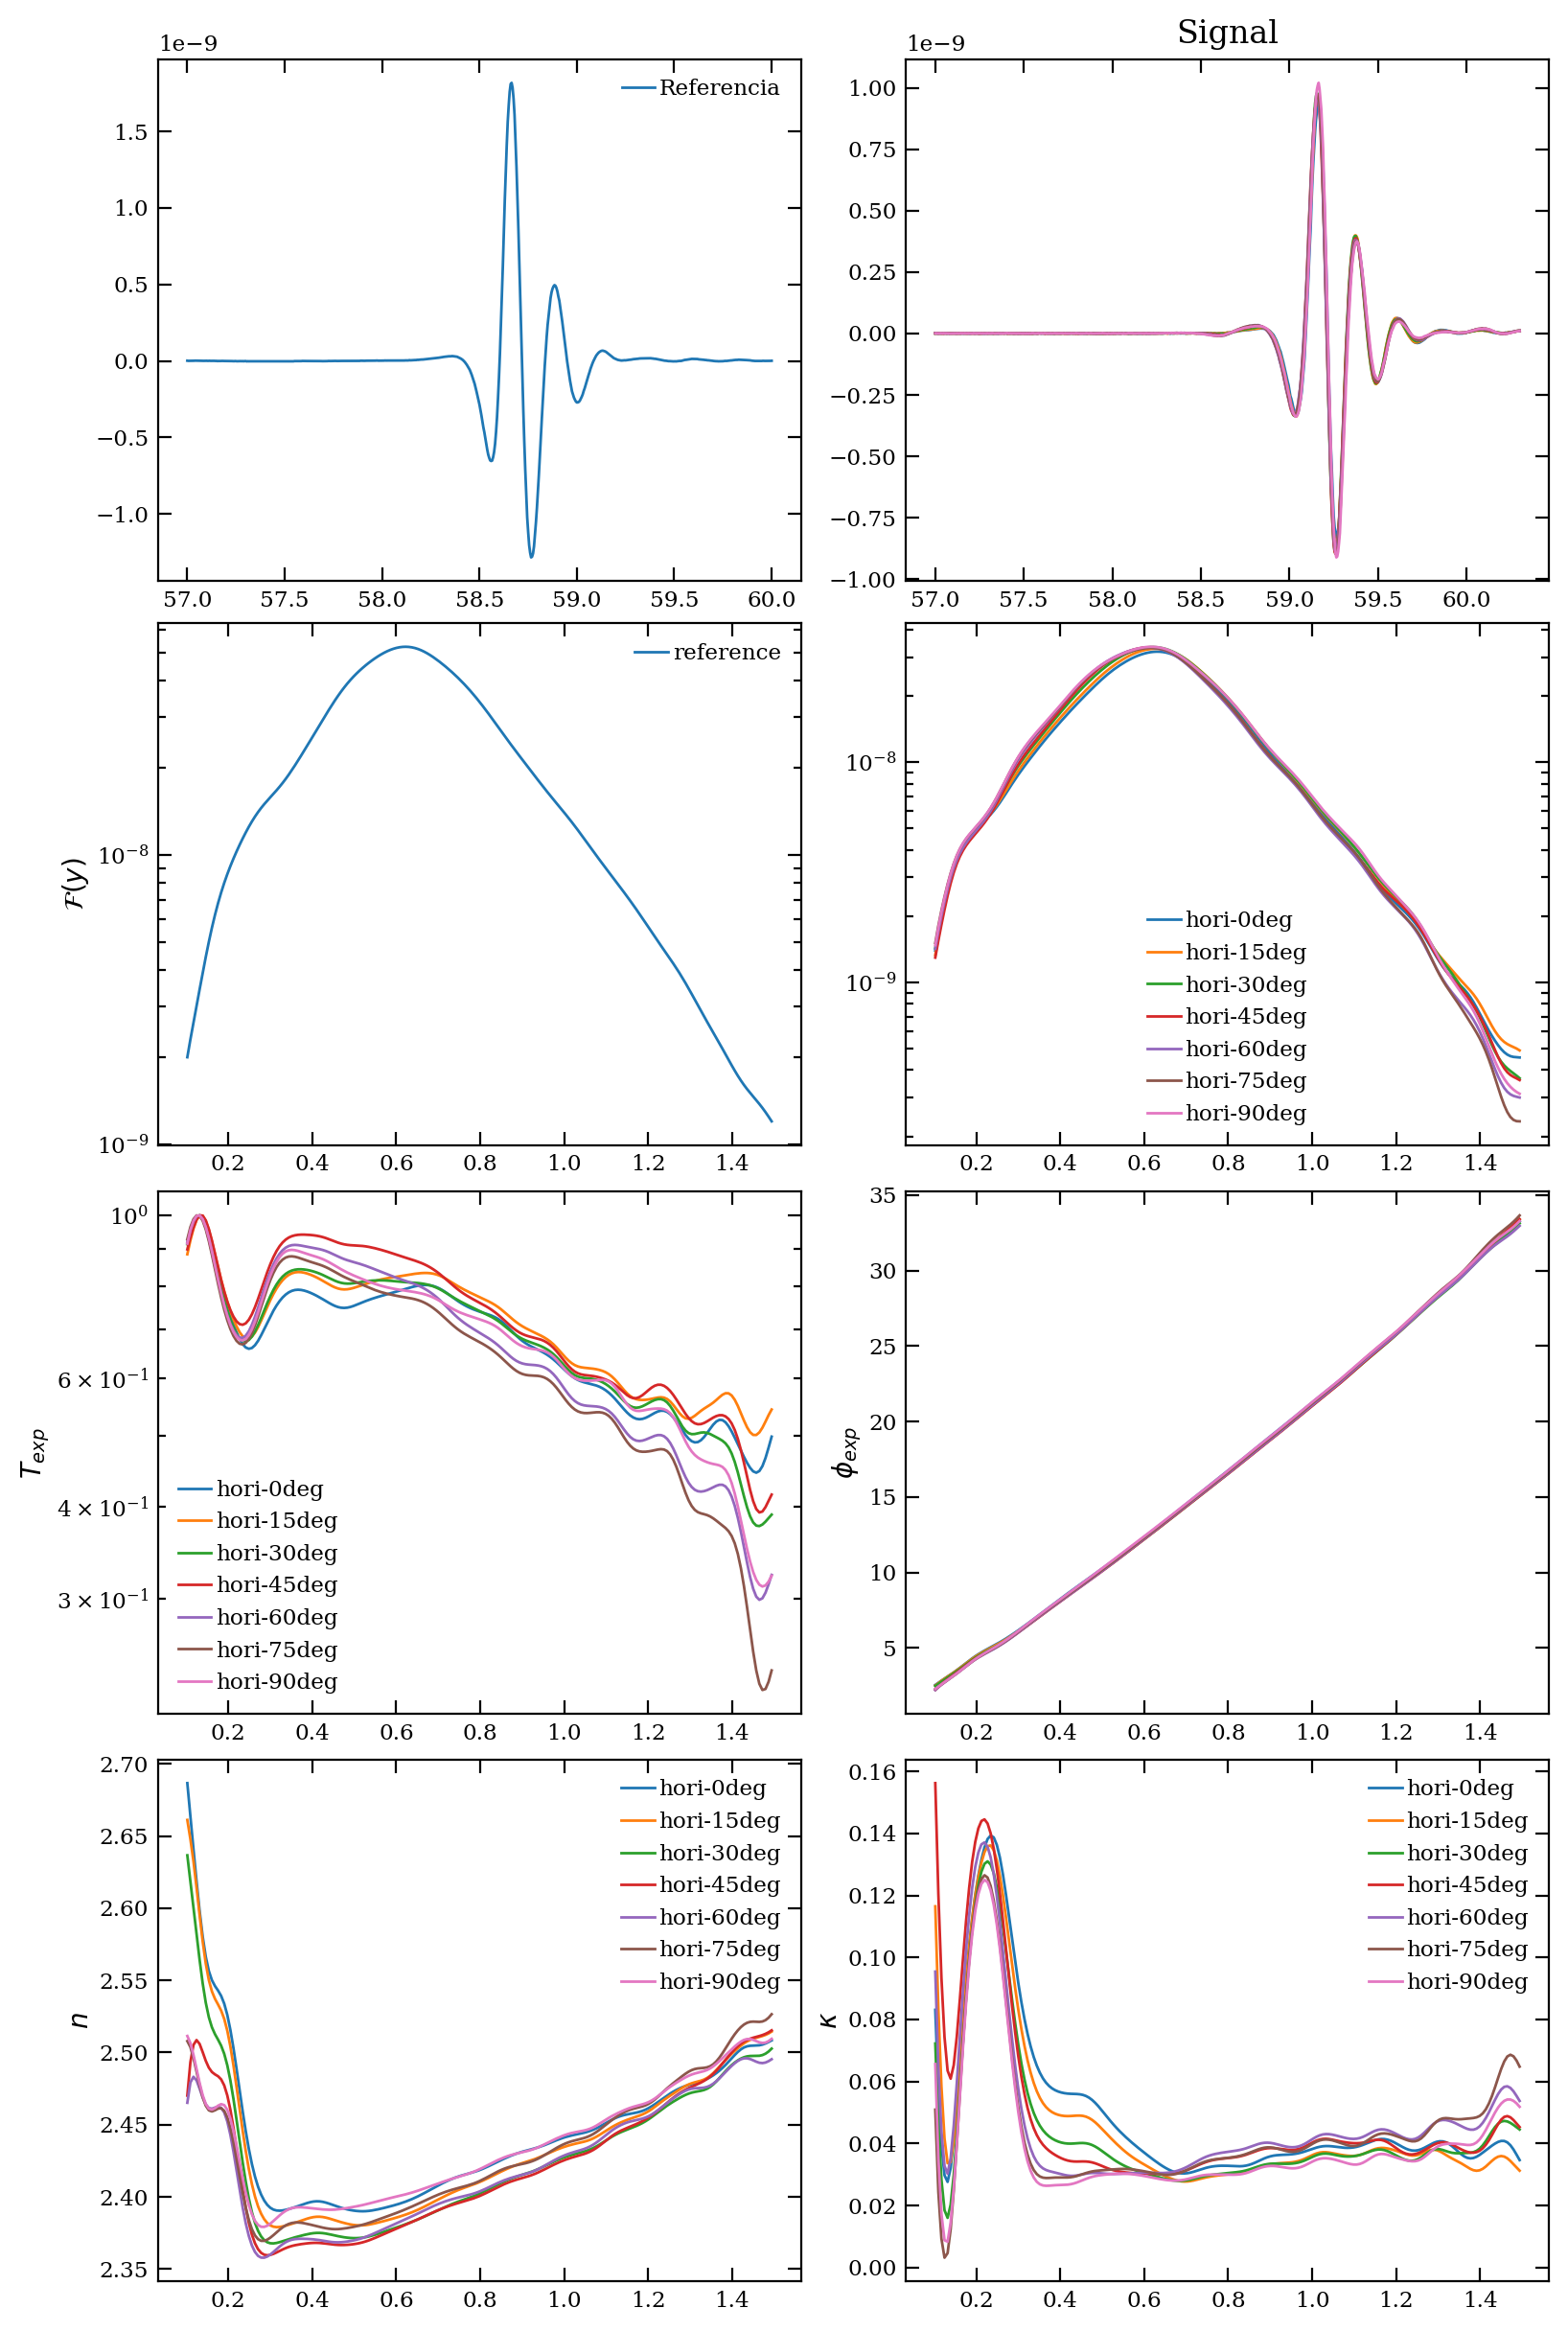

In [10]:
right_ref= 60
left = 57
N = 2**12
d = 0.704
f = plt.figure(figsize=(8,12),dpi=200)


plt.subplot(421)

x_ref,y_ref = getFilterdata(rutas_ref[0],right_ref,left)
plt.plot(x_ref,y_ref,label="Referencia")
plt.legend()

for j,path_signal in enumerate(rutas_transp_h):
    right_sample = 60.3
    left = 57
    plt.subplot(422)
    x,y = getFilterdata(path_signal,right_sample,left)
    # df1 = pd.read_csv(path_signal, delim_whitespace=True)
    plt.plot(x,y)
    plt.title("Signal")

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    # fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

     # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.1, 1.5
    mask = (nu >= xmin) & (nu <= xmax)

    nu_filtradas = nu[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]

    T = fft_y_signal/fft_y_subs
    T_exp = abs(T)
    phi_exp = np.angle(T)
    phi_exp = np.unwrap(phi_exp)

    plt.subplot(423)

    if j == 0:
        plt.plot(nu_filtradas,abs(fft_y_subs),label='reference')
    plt.legend()
    plt.ylabel(r"$\mathcal{F}(y)$")
    plt.yscale('log')

    plt.subplot(424)
    plt.plot(nu_filtradas,abs(fft_y_signal),label=angulos_transp_h[j])
    plt.legend()
    # plt.plot(nu_filtradas,abs(T)/max(abs(T)))
    plt.yscale('log')


    plt.subplot(425)
    plt.plot(nu_filtradas,abs(T)/max(abs(T)),label=angulos_transp_h[j])
    plt.ylabel(r"$T_{exp}$")
    plt.yscale('log')
    plt.legend()

    plt.subplot(426)
    plt.plot(nu_filtradas,phi_exp)
    plt.ylabel(r"$\phi_{exp}$")

    plt.subplot(427)
    n = calcular_n(nu_filtradas*2*np.pi, phi_exp, c, d)
    plt.plot(nu_filtradas,n,label=angulos_transp_h[j])
    plt.legend()
    plt.ylabel(r"$n$")
    
    plt.subplot(428)
    plt.ylabel(r"$\kappa$")
    plt.plot(nu_filtradas,calcular_kappa(nu_filtradas*2*np.pi, T_exp, n, c, d),label=angulos_transp_h[j])
    plt.legend()

In [11]:
ruta_actual = os.getcwd()
carpeta_ref = os.path.join(ruta_actual,"analisis_calcite","reference")
carpeta_transp_h = os.path.join(ruta_actual,"analisis_calcite","calcita_transp_anti")
rutas_ref = glob(os.path.join(carpeta_ref, "*"))
rutas_transp_h = glob(os.path.join(carpeta_transp_h, "*"))
angulos_transp_h  = extraer_angulos(rutas_transp_h)


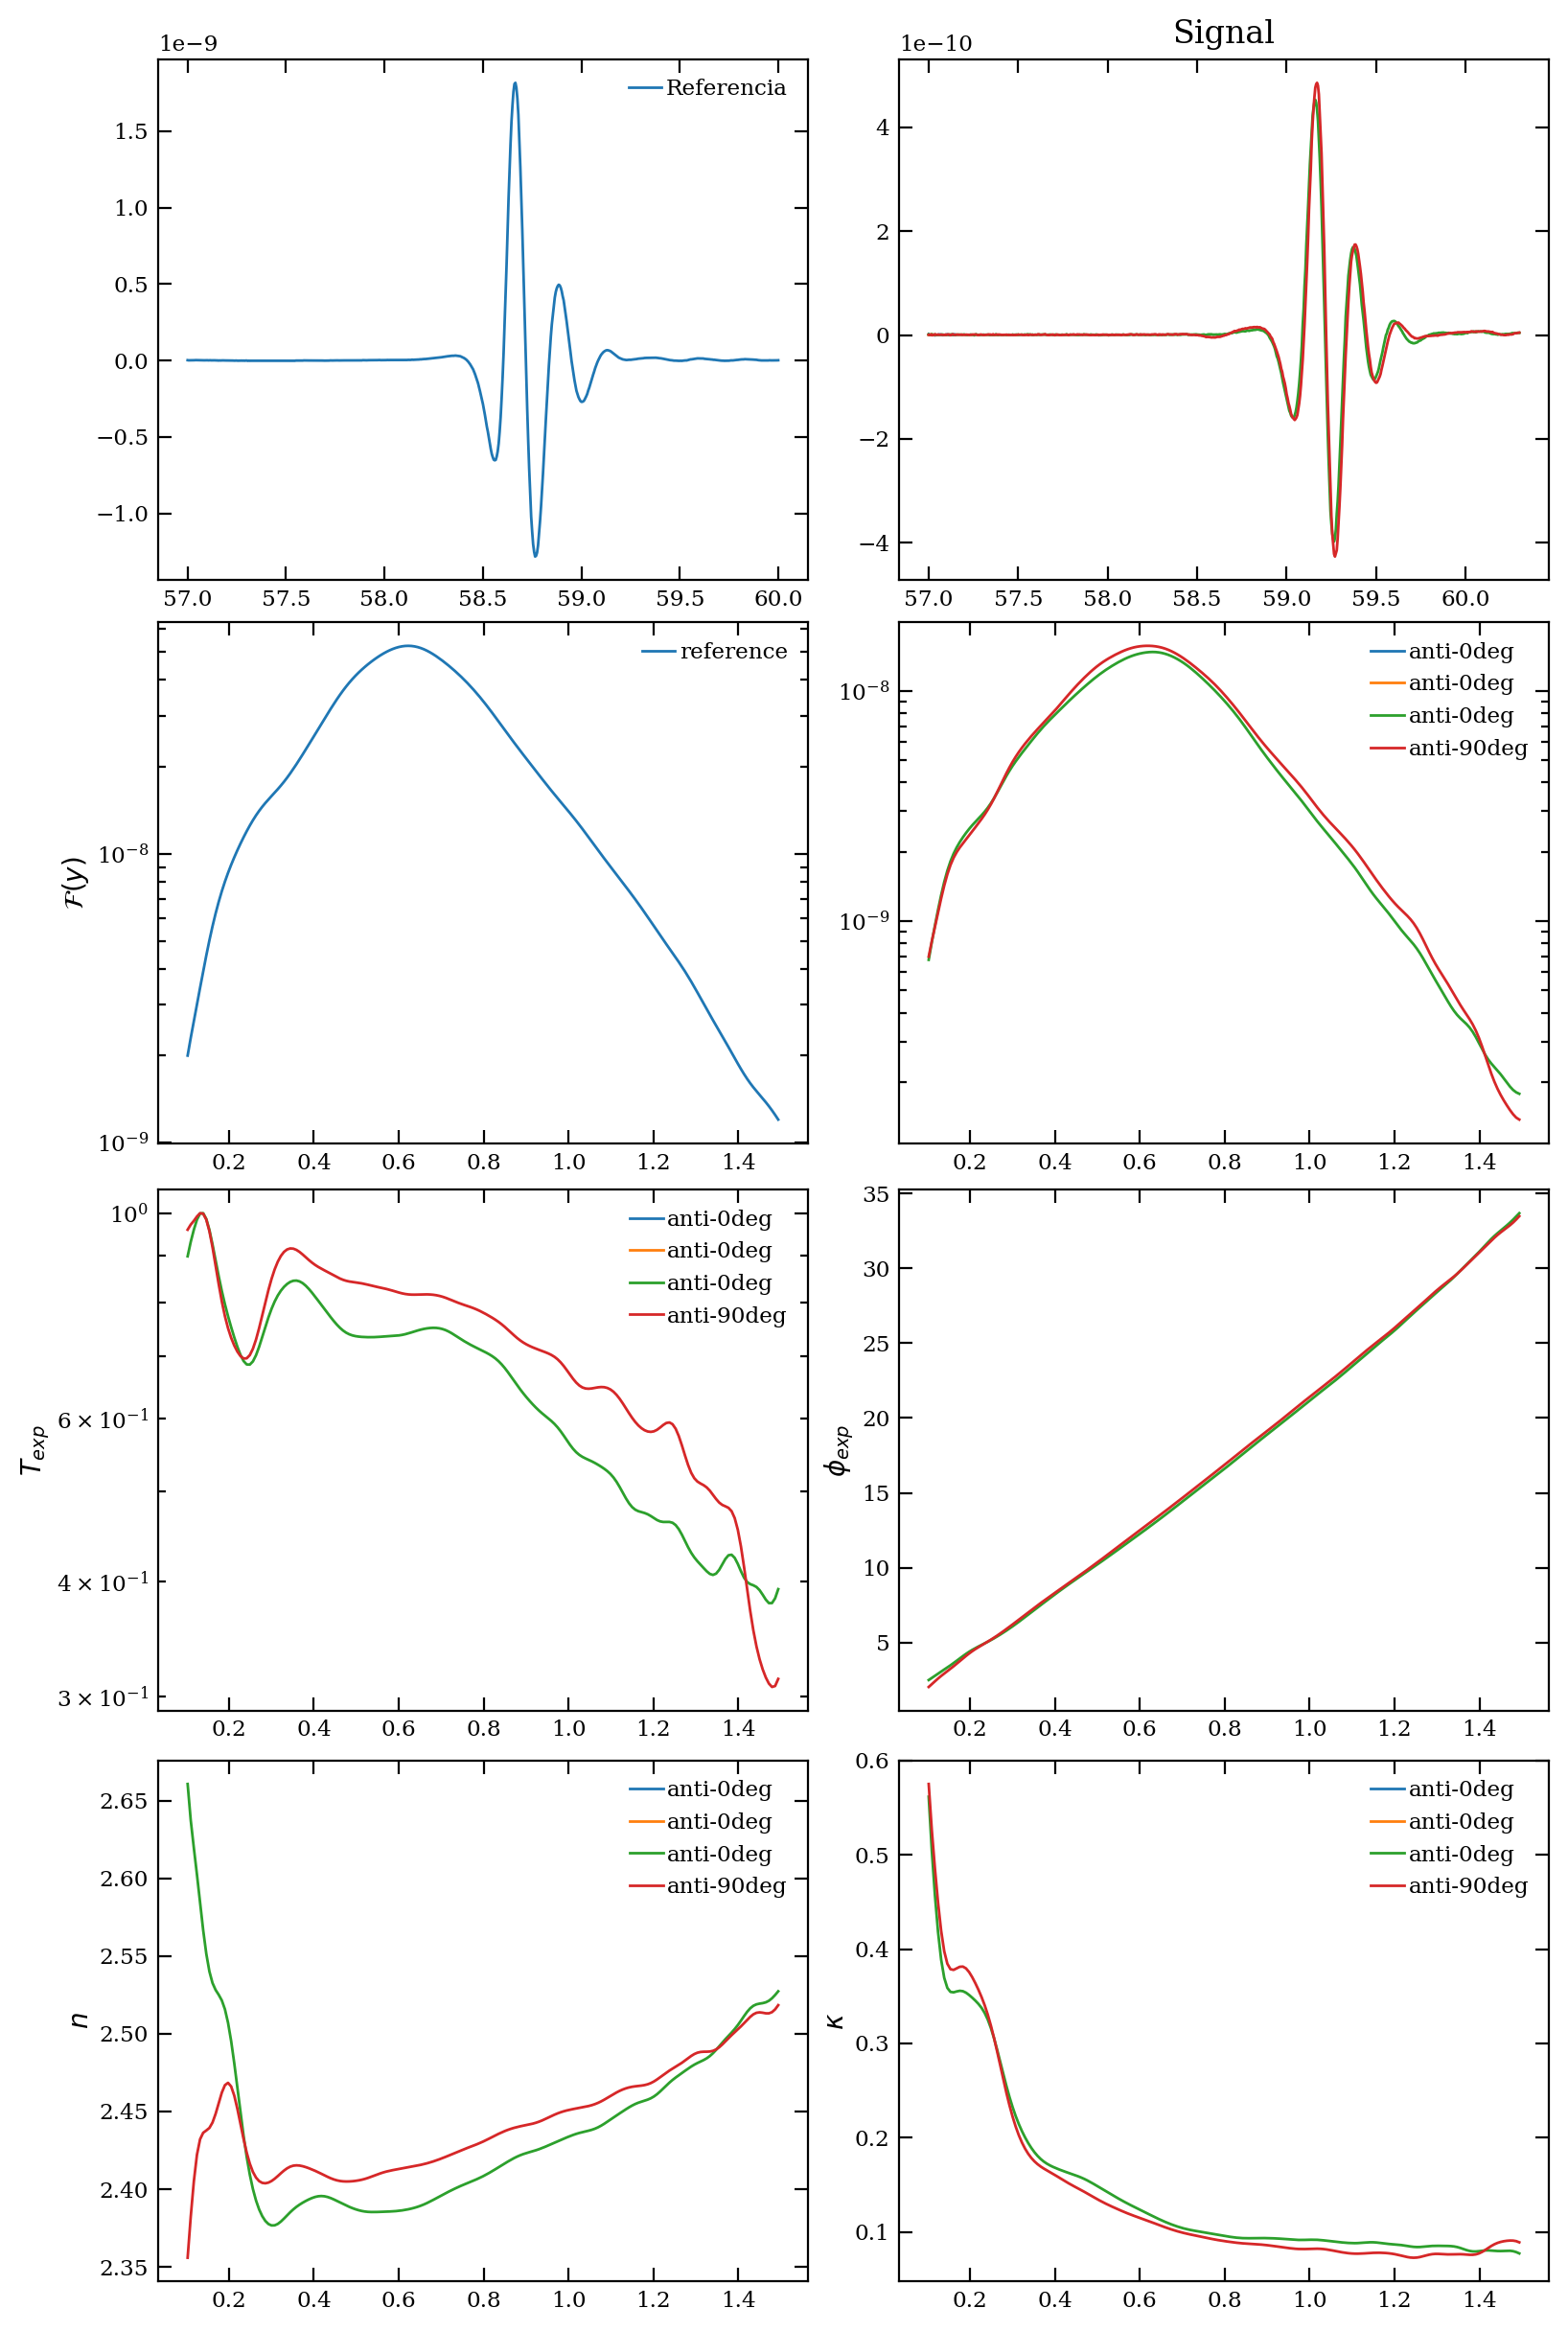

In [13]:
right_ref= 60
left = 57
N = 2**12
d = 0.704
f = plt.figure(figsize=(8,12),dpi=200)


plt.subplot(421)

x_ref,y_ref = getFilterdata(rutas_ref[0],right_ref,left)
plt.plot(x_ref,y_ref,label="Referencia")
plt.legend()

for j,path_signal in enumerate(rutas_transp_h):
    right_sample = 60.3
    left = 57
    plt.subplot(422)
    x,y = getFilterdata(path_signal,right_sample,left)
    # df1 = pd.read_csv(path_signal, delim_whitespace=True)
    plt.plot(x,y)
    plt.title("Signal")

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    # fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

     # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.1, 1.5
    mask = (nu >= xmin) & (nu <= xmax)

    nu_filtradas = nu[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]

    T = fft_y_signal/fft_y_subs
    T_exp = abs(T)
    phi_exp = np.angle(T)
    phi_exp = np.unwrap(phi_exp)

    plt.subplot(423)

    if j == 0:
        plt.plot(nu_filtradas,abs(fft_y_subs),label='reference')
    plt.legend()
    plt.ylabel(r"$\mathcal{F}(y)$")
    plt.yscale('log')

    plt.subplot(424)
    plt.plot(nu_filtradas,abs(fft_y_signal),label=angulos_transp_h[j])
    plt.legend()
    # plt.plot(nu_filtradas,abs(T)/max(abs(T)))
    plt.yscale('log')


    plt.subplot(425)
    plt.plot(nu_filtradas,abs(T)/max(abs(T)),label=angulos_transp_h[j])
    plt.ylabel(r"$T_{exp}$")
    plt.yscale('log')
    plt.legend()

    plt.subplot(426)
    plt.plot(nu_filtradas,phi_exp)
    plt.ylabel(r"$\phi_{exp}$")

    plt.subplot(427)
    n = calcular_n(nu_filtradas*2*np.pi, phi_exp, c, d)
    plt.plot(nu_filtradas,n,label=angulos_transp_h[j])
    plt.legend()
    plt.ylabel(r"$n$")
    
    plt.subplot(428)
    plt.ylabel(r"$\kappa$")
    plt.plot(nu_filtradas,calcular_kappa(nu_filtradas*2*np.pi, T_exp, n, c, d),label=angulos_transp_h[j])
    plt.legend()